Bar plots to include in FWE resilience paper

In [1]:
# Import packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from geocat.viz import util as gvutil 



ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


In [2]:
iandoDir = "~/PROGS/Belmont FWE/Indices/"
figDir= '~/PROGS/Belmont FWE/Figures/'
dDir = '/glade/u/home/maritye/PROGS/Belmont FWE/LOCA-data/loca5/'


In [3]:
with xr.open_dataset(iandoDir + 'LOCA_CESM1.R1mm.1981-2099.DJF.nc') as R1W:
    print('r1')

with xr.open_dataset(iandoDir + 'LOCA_CESM1.SDII.1981-2099.DJF.nc') as SDIIW:
    print('sdii')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.CDD.1981-2099.DJF.nc') as CDDW:
    print('cdd')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.CWD.1981-2099.DJF.nc') as CWDW:
    print('cwd')

r1
sdii
cdd
cwd


In [4]:
# open and change longitudes
with xr.open_dataset(iandoDir + 'LOCA_CESM1.RX1D.1981-2099.JJA.nc') as RX1DS:
    print('rx1')

with xr.open_dataset(iandoDir + 'LOCA_CESM1.RX5D.1981-2099.JJA.nc') as RX5DS:
    print('rx5')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.SDII.1981-2099.JJA.nc') as SDIIS:
    print('sdii')

with xr.open_dataset(iandoDir + 'LOCA_CESM1.R1mm.1981-2099.JJA.nc') as R1S:
    print('r1')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.CDD.1981-2099.JJA.nc') as CDDS:
    print('cdd')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.CWD.1981-2099.JJA.nc') as CWDS:
    print('cwd')

rx1
rx5
sdii
r1
cdd
cwd


In [5]:
with xr.open_dataset(iandoDir + 'LOCA_CESM1.PRCPTOT.1981-2099.nc') as PTOT:
    print('ptot')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.P95T.1981-2099.nc') as P95T:
    print('p95')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.N95.1981-2099.nc') as N95:
    print('n95')
   

ptot
p95
n95


In [64]:
with xr.open_dataset(iandoDir + 'LOCA_CESM1.N95.1981-2099.DJF.nc') as N95W:
    print('n95w')

with xr.open_dataset(iandoDir + 'LOCA_CESM1.N95.1981-2099.MAM.nc') as N95G:
    print('n95g')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.N95.1981-2099.JJA.nc') as N95S:
    print('n95s')
    
with xr.open_dataset(iandoDir + 'LOCA_CESM1.N95.1981-2099.SON.nc') as N95A:
    print('n95a')
 

n95w
n95g
n95s
n95a


In [6]:
with xr.open_dataset(dDir + 'Extraction_tasmax.nc') as dtx:
    dtx

In [7]:
# open and change longitudes
with xr.open_dataset(iandoDir + 'LOCA_CESM1.TXX.1981-2099.nc') as TXX:
    print('TXX')
with xr.open_dataset(iandoDir + 'LOCA_CESM1.TX90.1981-2099.JJA.nc') as TX90:
    print('TX90')

TXX
TX90


In [8]:
### Create some standard information to include in each of the datasets for ease of writing
years = np.arange(1980,2100)
proj= ['cesm1-cam5.1.rcp45', 'cesm1-cam5.1.rcp85']
lat = np.linspace(39.53125,42.34375,num=46)
lon = np.linspace(283.78125,285.59375, num=30) # calculate with original longs and then convert later
dims = ("proj", 'year', 'lat', 'lon')
attribs = dict(description='Number of Ninety Degree Days for LOCA data over Delaware River Basin. Using CESM1/RCP4.5 and RCP8.5.', 
                history='Created by Mari Tye December 2022.' )

In [9]:
#calculate ninety degree days = 32.2222C
TNDD = xr.DataArray(None, coords=dict(proj=proj, year=years, lat = lat, lon = lon), dims=dims, attrs=attribs, name='TNDD')
for r in range(2):
    print(proj[r])
    
    ds = dtx.sel(projection=r)
    TNDD[r,:,:,:] = xr.DataArray(xr.where(ds['tasmax'] > 32.22222,1,0).groupby('time.year').sum('time'), name='TNDD')
    print('tndd')
    tnddnm = iandoDir + 'LOCA_CESM1.TNDD.1981-2099.nc'
    
    # and write out to netcdf
    TNDD.to_netcdf(tnddnm)


cesm1-cam5.1.rcp45
tndd
cesm1-cam5.1.rcp85
tndd


In [10]:
df = TNDD
cur = xr.DataArray(df.sel(year=slice('1981-01-01','2010-12-31')).mean('year').mean('proj'), name='CUR')
r45= xr.DataArray(df.isel(proj=0).sel(year=slice('2040-01-01','2069-12-31')).mean('year').squeeze(), name='Fut_r45')
r85 = xr.DataArray(df.isel(proj=1).sel(year=slice('2040-01-01','2069-12-31')).mean('year').squeeze(), name='Fut_r85')

In [11]:
new = xr.merge([cur, r45, r85], compat='override')
newnm = iandoDir + 'LOCA_CESM1.TNDD.climatologies.nc'
new.to_netcdf(newnm)
    
    

## Bar Plots

Now make the bar plots of temperature and some of the precip indices

Need to create a mask to get rid of blank areas and not all of the zero days!

In [12]:
txmask = dtx.tasmax.isel(time=0).isel(projection=0).squeeze().drop_vars('time')

In [13]:
# To account for the spatial variability in values (and short time series) stack data by ensemble member, lat and lon, and take the mean over the year, and drop na values
txx_cp_stax = TXX['TXX'].where(txmask.notnull()).sel(year=slice(1980,2010)).mean('year').mean('proj').stack(z=('lat', 'lon')).dropna('z')
txx_45_stax = TXX['TXX'].where(txmask.notnull()).sel(year=slice(2040,2069)).mean('year').isel(proj=0).stack(z=('lat', 'lon')).dropna('z')
txx_85_stax = TXX['TXX'].where(txmask.notnull()).sel(year=slice(2040,2069)).mean('year').isel(proj=1).stack(z=('lat', 'lon')).dropna('z')
tx90_cp_stax = TX90['TX90'].where(txmask.notnull()).sel(year=slice(1980,2010)).mean('year').mean('proj').stack(z=('lat', 'lon')).dropna('z')
tx90_45_stax = TX90['TX90'].where(txmask.notnull()).sel(year=slice(2040,2069)).mean('year').isel(proj=0).stack(z=('lat', 'lon')).dropna('z')
tx90_85_stax = TX90['TX90'].where(txmask.notnull()).sel(year=slice(2040,2069)).mean('year').isel(proj=1).stack(z=('lat', 'lon')).dropna('z')
ndd_cp_stax = cur.where(txmask.notnull()).stack(z=('lat', 'lon')).dropna('z')
ndd_45_stax = r45.where(txmask.notnull()).stack(z=('lat','lon')).dropna('z')
ndd_85_stax = r85.where(txmask.notnull()).stack(z=('lat', 'lon')).dropna('z')

In [14]:
# Use a mean value of the region and stack interannual variability instead
txx_cp_stax = TXX['TXX'].where(txmask.notnull()).sel(year=slice(1980,2010)).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
txx_45_stax = TXX['TXX'].where(txmask.notnull()).sel(year=slice(2040,2069)).isel(proj=0).mean(dim=('lat','lon'))
txx_85_stax = TXX['TXX'].where(txmask.notnull()).sel(year=slice(2040,2069)).isel(proj=1).mean(dim=('lat', 'lon'))
tx90_cp_stax = TX90['TX90'].where(txmask.notnull()).sel(year=slice(1980,2010)).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
tx90_45_stax = TX90['TX90'].where(txmask.notnull()).sel(year=slice(2040,2069)).isel(proj=0).mean(dim=('lat', 'lon'))
tx90_85_stax = TX90['TX90'].where(txmask.notnull()).sel(year=slice(2040,2069)).isel(proj=1).mean(dim=('lat', 'lon'))
ndd_cp_stax = df.sel(year=slice('1981-01-01','2010-12-31')).where(txmask.notnull()).mean(dim=('lat', 'lon')).stack(z=('year', 'proj')).dropna('z')
ndd_45_stax = df.sel(year=slice('2040-01-01','2069-12-31')).where(txmask.notnull()).isel(proj=0).mean(dim=('lat','lon'))
ndd_85_stax = df.sel(year=slice('2040-01-01','2069-12-31')).where(txmask.notnull()).isel(proj=1).mean(dim=('lat', 'lon'))

In [15]:
from matplotlib.gridspec import GridSpec

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


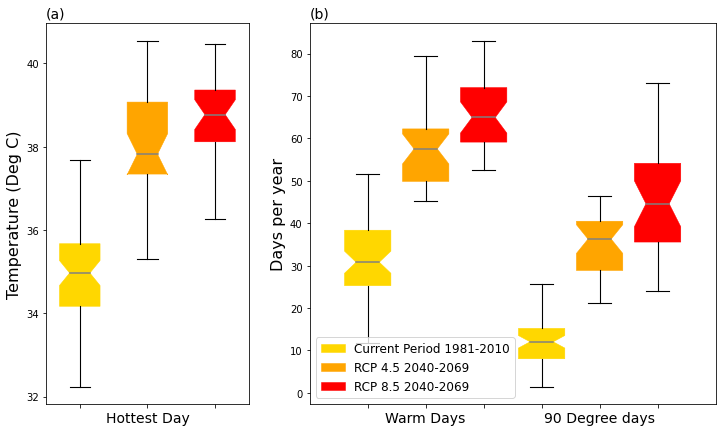

In [54]:
fig = plt.figure(figsize=(12,7))
#fig.suptitle("Projected High Temperature Indices", fontsize=18)

gs = GridSpec(1, 2, width_ratios=[1, 2])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

kwargs = dict(
        showfliers=False, # extreme extents
        patch_artist=True, # colour boxes
        showmeans = False,
        notch=True,
        vert=True,
        boxprops={"linewidth": 0.5},
        whiskerprops={"linewidth": 1.1},
        capprops={"linewidth": 1.1},
        manage_ticks=True,
        medianprops={"color": "gray", "linewidth": 1.5},
)

# txx box plot
bplot1 = ax1.boxplot([txx_cp_stax, txx_45_stax, txx_85_stax],
                     **kwargs,
                     positions=np.arange(3),
                     widths=0.6
                    )
#ax1.set_title('Hottest Day', fontsize=16)
ax1.set_ylabel('Temperature (Deg C)', fontsize=16)
ax1.set_xlim(-0.5,2.5)
ax1.set_xticklabels(['','Hottest Day',""], rotation=0, fontsize=14)
ax1.set_title("(a)", fontsize=14, loc='left')

# tx90 90degdays box plots
bp2 = ax2.boxplot([tx90_cp_stax, tx90_45_stax,tx90_85_stax],
                  widths=0.2,
                  **kwargs,
                 positions= (-0.25, 0, 0.25))                  

bp3 = ax2.boxplot([ndd_cp_stax,ndd_45_stax, ndd_85_stax],
                  widths=0.2,
                  **kwargs,
                 positions= (0.5, 0.75, 1))
                  
#ax2.set_title('Frequency of Hot Days', fontsize=16)
ax2.set_ylabel('Days per year', fontsize=16)
ax2.set_xlim(-0.5, 1.25)
ax2.set_xticklabels(['','Warm Days',"", '', '90 Degree days', ""], rotation=0, fontsize=14)
ax2.set_title("(b)", fontsize=14, loc='left')
ax2.legend()

# fill with colors
colors = ['gold', 'orange', 'red']
for bplot in (bplot1, bp2, bp3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_color(color)
        
plt.legend([bplot1["boxes"][0], bp2["boxes"][1], bp3["boxes"][2]], ["Current Period 1981-2010", 'RCP 4.5 2040-2069','RCP 8.5 2040-2069'], loc='lower left', fontsize=12)
"""
# Finally, add a basic legend
fig.text(0.35, 0.065, "Current Period 1981-2010",
         backgroundcolor=colors[0], weight='roman',
         size='large')
fig.text(0.35, 0.035, 'RCP 4.5 2040-2069',
         backgroundcolor=colors[1],
         weight='roman', size='large')
fig.text(0.35, 0.00, 'RCP 8.5 2040-2069', backgroundcolor=colors[2],
         weight='roman', size='large')
"""
pltnm = 'Figure3_TemperatureIndices_arealmean.jpg'
plt.savefig(pltnm)
plt.show()

Repeat areal mean values and create a plot of variability in some of the precipitation indices.

winter and summer: CDD, CWD, R1
annual rx1 rx5

In [49]:
cddw_cp = CDDW['CDD'].where(txmask.notnull()).sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
cddw_45 = CDDW['CDD'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
cddw_85 = CDDW['CDD'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)
cdds_cp = CDDS['CDD'].where(txmask.notnull()).sel(year=slice('1981-01-01','2011-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
cdds_45 = CDDS['CDD'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
cdds_85 = CDDS['CDD'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)
cdds_85

<xarray.DataArray 'CDD' (year: 30)>
array([ 9.14949749,  7.90075377,  8.94095477, 11.45979899,  6.60175879,
        8.57160804,  8.11809045,  7.35427136,  8.34798995,  7.9120603 ,
        6.59547739,  7.36683417,  7.5138191 ,  6.82286432, 11.22236181,
        7.05904523,  7.64447236,  8.21356784,  6.89698492,  9.93467337,
        7.02638191,  7.8379397 ,  6.64321608,  7.76005025,  8.17336683,
        8.47236181,  8.74748744,  8.60678392,  9.03015075,  5.77261307])
Coordinates:
    proj     <U18 'cesm1-cam5.1.rcp85'
  * year     (year) int64 2041 2042 2043 2044 2045 ... 2066 2067 2068 2069 2070

In [50]:
cwdw_cp = CWDW['CWD'].where(txmask.notnull()).sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
cwdw_45 = CWDW['CWD'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
cwdw_85 = CWDW['CWD'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)
cwds_cp = CWDS['CWD'].where(txmask.notnull()).sel(year=slice('1981-01-01','2011-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
cwds_45 = CWDS['CWD'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
cwds_85 = CWDS['CWD'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)


In [51]:
r1w_cp = R1W['R1mm'].where(txmask.notnull()).sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
r1w_45 = R1W['R1mm'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
r1w_85 = R1W['R1mm'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)
r1s_cp = R1S['R1mm'].where(txmask.notnull()).sel(year=slice('1981-01-01','2011-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
r1s_45 = R1S['R1mm'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
r1s_85 = R1S['R1mm'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)
r1s_85

<xarray.DataArray 'R1mm' (year: 30)>
array([42.34798995, 45.91582915, 36.83542714, 33.00502513, 40.53894472,
       47.23241206, 49.75628141, 42.79271357, 44.99120603, 47.01633166,
       42.99623116, 46.76256281, 41.46356784, 48.98241206, 34.76884422,
       52.73743719, 47.38944724, 44.63065327, 46.9798995 , 38.42085427,
       46.34673367, 42.16331658, 61.08542714, 45.5540201 , 50.63819095,
       44.96984925, 43.92839196, 38.00753769, 46.84296482, 57.34673367])
Coordinates:
    proj     <U18 'cesm1-cam5.1.rcp85'
  * year     (year) int64 2041 2042 2043 2044 2045 ... 2066 2067 2068 2069 2070

In [52]:
rx1_cp = RX1DS['RX1D'].where(txmask.notnull()).sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
rx1_45 = RX1DS['RX1D'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
rx1_85 = RX1DS['RX1D'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)
rx5_cp = RX5DS['RX5D'].where(txmask.notnull()).sel(year=slice('1981-01-01','2011-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
rx5_45 = RX5DS['RX5D'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
rx5_85 = RX5DS['RX5D'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)
rx5_cp

<xarray.DataArray 'RX5D' (z: 60)>
array([121.51279414,  74.98498092,  74.23565188,  89.99413718,
        63.55494056,  56.26833459,  66.56378003,  59.00226706,
        43.93391514, 110.41837348,  65.8966578 ,  60.96839418,
        79.30280561,  74.85783552,  94.05487664,  84.04648969,
        75.68071601,  87.44605154, 148.71465853,  55.53973626,
        53.01566488,  52.87836346,  99.56423567, 103.80231499,
        41.84852895,  65.40385643,  55.84677638,  53.17771914,
        59.75883202, 175.62944914, 121.51279414,  74.98498092,
        74.23565188,  89.99413718,  63.55494056,  56.26833459,
        66.56378003,  59.00226706,  43.93391514, 110.41837348,
        65.8966578 ,  60.96839418,  79.30280561,  74.85783552,
        94.05487664,  84.04648969,  75.68071601,  87.44605154,
       148.71465853,  55.53973626,  53.01566488,  52.87836346,
        99.56423567, 103.80231499,  86.92222674,  75.32509742,
        59.46951546,  65.81048712, 119.17772624,  75.07223413])
Coordinates:
  * z        (z) object MultiIndex
  * proj     (z) object 'cesm1-cam5.1.rcp45' ... 'cesm1-cam5.1.rcp85'
  * year     (z) int64 1982 1983 1984 1985 1986 ... 2007 2008 2009 2010 2011

In [61]:
p95t_cp = P95T['P95T'].where(txmask.notnull()).sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
p95t_45 = P95T['P95T'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
p95t_85 = P95T['P95T'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)
n95_cp = N95['N95'].where(txmask.notnull()).sel(year=slice('1981-01-01','2011-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
n95_45 = N95['N95'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
n95_85 = N95['N95'].where(txmask.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)

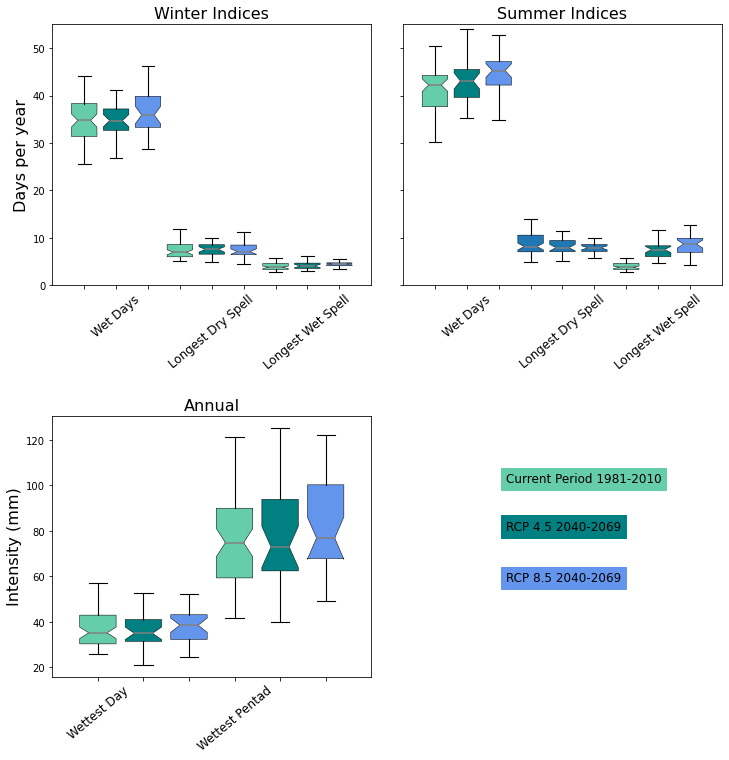

In [91]:
fig = plt.figure(figsize=(12,12))
#fig.suptitle("Projected Heavy Precipitation Indices", fontsize=18)

gs = GridSpec(2, 2,hspace=0.5, wspace=0.1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

kwargs = dict(
        showfliers=False, # extreme extents
        patch_artist=True, # colour boxes
        showmeans = False,
        notch=True,
        vert=True,
        boxprops={"linewidth": 0.5},
        whiskerprops={"linewidth": 1.1},
        capprops={"linewidth": 1.1},
        manage_ticks=True,
        medianprops={"color": "gray", "linewidth": 1.5},
)

# winter frequency box plots
bp1w = ax1.boxplot([r1w_cp, r1w_45,r1w_85],
                  widths=0.2,
                  **kwargs,
                 positions= (-0.25, 0, 0.25))                  

bp2w = ax1.boxplot([cddw_cp, cddw_45, cddw_85],
                  widths=0.2,
                  **kwargs,
                 positions= (0.5, 0.75, 1))
bp3w = ax1.boxplot([cwdw_cp, cwdw_45, cwdw_85],
                  widths=0.2,
                  **kwargs,
                 positions= (1.25, 1.5, 1.75))

ax1.set_title('Winter Indices', fontsize=16)
                  
ax1.set_ylabel('Days per year', fontsize=16)
ax1.set_xlim(-0.5, 2)
ax1.set_ylim(0,55)
ax1.set_xticklabels(["",'Wet Days',"",'', 'Longest Dry Spell', "", "", "Longest Wet Spell",""], rotation=40, fontsize=12)

# summer frequency box plots
bp1 = ax2.boxplot([r1s_cp, r1s_45,r1s_85],
                  widths=0.2,
                  **kwargs,
                 positions= (-0.25, 0, 0.25))                  

bp2 = ax2.boxplot([cdds_cp, cdds_45, cdds_85],
                  widths=0.2,
                  **kwargs,
                 positions= (0.5, 0.75, 1))

bp3 = ax2.boxplot([cwdw_cp, cwds_45, cwds_85],
                  widths=0.2,
                  **kwargs,
                 positions= (1.25, 1.5, 1.75))
ax2.set_title('Summer Indices', fontsize=16)
                  
ax2.tick_params(labelleft=False)
ax2.set_xlim(-0.5, 2)
ax2.set_ylim(0,55)
ax2.set_xticklabels(["",'Wet Days',"", '', 'Longest Dry Spell', "", "", "Longest Wet Spell",""], rotation=40, fontsize=12)

# Intensity Figures
bp4 = ax3.boxplot([rx1_cp, rx1_45, rx1_85],
                  widths=0.2,
                  **kwargs,
                 positions= (0.5, 0.75, 1))

bp5 = ax3.boxplot([rx5_cp, rx5_45, rx5_85],
                  widths=0.2,
                  **kwargs,
                 positions= (1.25, 1.5, 1.75))
ax3.set_title('Annual', fontsize=16)
                  
ax3.set_ylabel('Intensity (mm)', fontsize=16)
ax3.set_xlim(0.25, 2)
ax3.set_xticklabels(['Wettest Day',"", '', 'Wettest Pentad', "", ""], rotation=40, fontsize=12)

# fill with colors
colors = ['mediumaquamarine', 'teal', 'cornflowerblue']
for bplot in (bp1w, bp2w, bp3w, bp1, bp3, bp4, bp5):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Finally, add a basic legend
fig.text(0.65, 0.35, "Current Period 1981-2010",
         backgroundcolor=colors[0], weight='roman',
         size='large')
fig.text(0.65, 0.295, 'RCP 4.5 2040-2069',
         backgroundcolor=colors[1],
         weight='roman', size='large')
fig.text(0.65, 0.235, 'RCP 8.5 2040-2069', backgroundcolor=colors[2],
         weight='roman', size='large')

#pltnm = 'PrecipitationIndices_arealmean.jpg'
plt.savefig(pltnm)
plt.show()

Need to import P95T PRCPTOT and seasonal N95 data

In [80]:
blanx = P95T.where(P95T>0)

In [151]:
for r in range(2):
    val=P95T.P95T.isel(proj=r)/PTOT.PRCPTOT.isel(proj=r)

In [153]:
p95_cp = val.where(blanx.notnull()).sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
p95_45 = val.where(blanx.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
p95_85 = val.where(blanx.notnull()).sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)


In [155]:
p95_45

<xarray.Dataset>
Dimensions:  (year: 30)
Coordinates:
    proj     <U18 'cesm1-cam5.1.rcp45'
  * year     (year) int64 2041 2042 2043 2044 2045 ... 2066 2067 2068 2069 2070
Data variables:
    P95T     (year) float64 0.2831 0.1158 0.3092 0.2343 ... 0.2696 0.2411 0.2426

In [125]:
n95w_cp = N95W.sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
n95w_45 = N95W.sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
n95w_85 = N95W.sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)


In [132]:
n95g_cp = N95G.sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
n95g_45 = N95G.sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
n95g_85 = N95G.sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)


In [133]:
n95s_cp = N95S.sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
n95s_45 = N95S.sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
n95s_85 = N95S.sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)


In [134]:
n95a_cp = N95A.sel(year=slice('1981-01-01','2012-12-31')).mean(dim=('lat', 'lon')).stack(z=('proj', 'year')).dropna('z')
n95a_45 = N95A.sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=0)
n95a_85 = N95A.sel(year=slice('2040-01-01','2070-12-31')).mean(dim=('lat', 'lon')).isel(proj=1)


/glade/scratch/maritye/ipykernel_300501/1501389875.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['','Winter',"", '', 'Spring', "", '', 'Summer', "", '', 'Fall', ""], rotation=30, fontsize=12)


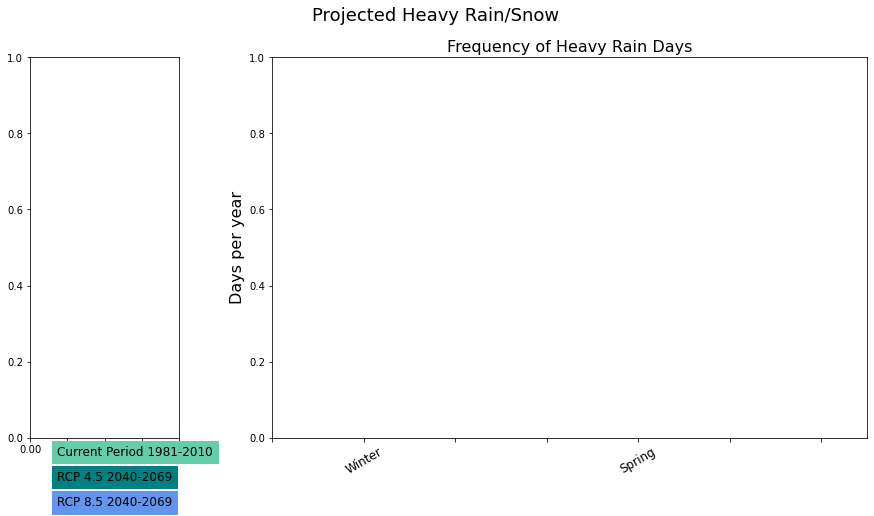

In [69]:
fig = plt.figure(figsize=(15,7))
fig.suptitle("Projected Heavy Rain/Snow", fontsize=18)

gs = GridSpec(1, 2, wspace=0.25, width_ratios=[1,4])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

kwargs = dict(
        showfliers=False, # extreme extents
        patch_artist=True, # colour boxes
        showmeans = False,
        notch=True,
        vert=True,
        boxprops={"linewidth": 0.5},
        whiskerprops={"linewidth": 1.1},
        capprops={"linewidth": 1.1},
        manage_ticks=True,
        medianprops={"color": "gray", "linewidth": 1.5},
)

# txx box plot
bp1 = ax1.boxplot([p95_cp, p95_45, p95_85],
                     **kwargs,
                     positions=np.arange(3),
                     widths=0.6
                    )
ax1.set_ylabel('Proportion', fontsize=16)
ax1.set_title('Proportion of Annual Total', fontsize=16)
ax1.set_xticklabels(['','',""])

# tx90 90degdays box plots
bp2 = ax2.boxplot([n95w_cp, n95w_45,n95w_85],
                  widths=0.2,
                  **kwargs,
                 positions= (-0.25, 0, 0.25))                  
bp3 = ax2.boxplot([n95g_cp, n95g_45,n95g_85],
                  widths=0.2,
                  **kwargs,
                 positions= (0.5, 0.75, 1))                  
bp4 = ax2.boxplot([n95s_cp, n95s_45,n95s_85],
                  widths=0.2,
                  **kwargs,
                 positions= (1.25, 1.5, 1.75))                  
bp5 = ax2.boxplot([n95a_cp, n95a_45,n95a_85],
                  widths=0.2,
                  **kwargs,
                 positions= (2, 2.25, 2.5))                  

                  
ax2.set_title('Frequency of Heavy Rain Days', fontsize=16)
ax2.set_ylabel('Days per year', fontsize=16)
ax2.set_xlim(-0.5, 2.75)
ax2.set_xticklabels(['','Winter',"", '', 'Spring', "", '', 'Summer', "", '', 'Fall', ""], rotation=30, fontsize=12)


# fill with colors
colors = ['mediumaquamarine', 'teal', 'cornflowerblue']
for bplot in (bp1, bp2, bp3, bp4, bp5):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Finally, add a basic legend
fig.text(0.15, 0.09, "Current Period 1981-2010",
         backgroundcolor=colors[0], weight='roman',
         size='large')
fig.text(0.15, 0.04, 'RCP 4.5 2040-2069',
         backgroundcolor=colors[1],
         weight='roman', size='large')
fig.text(0.15, -0.01, 'RCP 8.5 2040-2069', backgroundcolor=colors[2],
         weight='roman', size='large')

pltnm = 'ProportionHeavyRain_arealmean.jpg'
plt.savefig(pltnm)
plt.show()

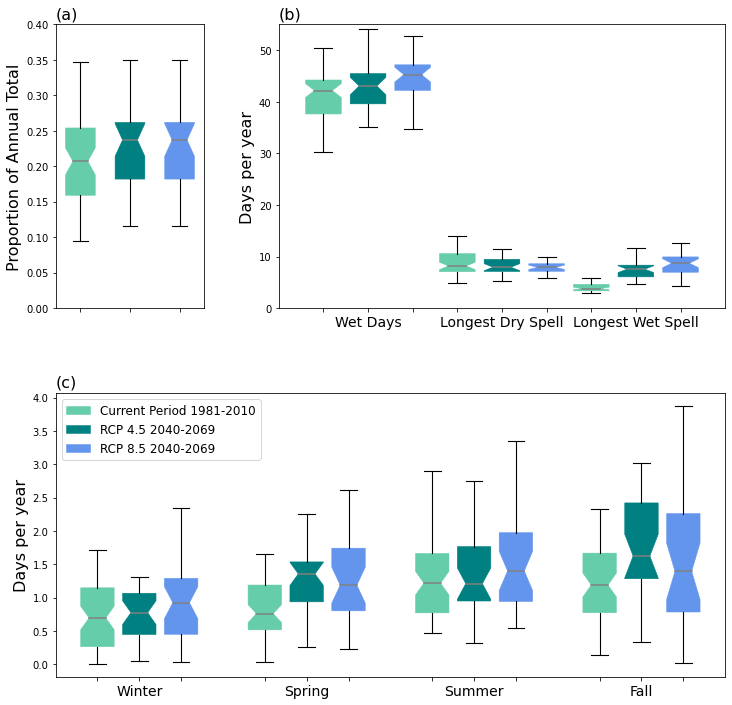

In [162]:
fig = plt.figure(figsize=(12,12), )
#fig.suptitle("Projected Heavy Precipitation Indices", fontsize=18)

gs = GridSpec(2, 2, wspace=0.25, hspace=0.3, width_ratios=[1,3])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2:])

kwargs = dict(
        showfliers=False, # extreme extents
        patch_artist=True, # colour boxes
        showmeans = False,
        notch=True,
        vert=True,
        boxprops={"linewidth": 0.5},
        whiskerprops={"linewidth": 1.1},
        capprops={"linewidth": 1.1},
        manage_ticks=True,
        medianprops={"color": "gray", "linewidth": 1.5},
)

# proportion of annual total
bp1 = ax1.boxplot([p95_cp.P95T, p95_45.P95T, p95_85.P95T],
                     **kwargs,
                     positions=np.arange(3),
                    widths=0.6
                    )
ax1.set_ylabel('Proportion of Annual Total', fontsize=16)
ax1.set_title('(a)', fontsize=16, loc='left')
ax1.set_ylim(0,0.4)
ax1.set_xticklabels(['','',""])

# number of very heavy rain
bp2 = ax3.boxplot([n95w_cp.N95, n95w_45.N95,n95w_85.N95],
                  widths=0.2,
                  **kwargs,
                 positions= (-0.25, 0, 0.25))                  
bp3 = ax3.boxplot([n95g_cp.N95, n95g_45.N95,n95g_85.N95],
                  widths=0.2,
                  **kwargs,
                 positions= (0.75, 1,1.25))                  
bp4 = ax3.boxplot([n95s_cp.N95, n95s_45.N95,n95s_85.N95],
                  widths=0.2,
                  **kwargs,
                 positions= (1.75,2,2.25))                  
bp5 = ax3.boxplot([n95a_cp.N95, n95a_45.N95,n95a_85.N95],
                  widths=0.2,
                  **kwargs,
                 positions= (2.75,3,3.25))                  

                  
ax3.set_title('(c)', fontsize=16, loc='left')
ax3.set_ylabel('Days per year', fontsize=16)
ax3.set_xlim(-0.5, 3.5)
ax3.set_xticklabels(['','Winter',"", '', 'Spring', "", '', 'Summer', "", '', 'Fall', ""], fontsize=14)

# summer frequency box plots
bp6 = ax2.boxplot([r1s_cp, r1s_45,r1s_85],
                  widths=0.2,
                  **kwargs,
                 positions= (-0.25, 0, 0.25))                  

bp7 = ax2.boxplot([cdds_cp, cdds_45, cdds_85],
                  widths=0.2,
                  **kwargs,
                 positions= (0.5, 0.75, 1))

bp8 = ax2.boxplot([cwdw_cp, cwds_45, cwds_85],
                  widths=0.2,
                  **kwargs,
                 positions= (1.25, 1.5, 1.75))
ax2.set_title('(b)', fontsize=16, loc="left")
ax2.set_ylabel('Days per year', fontsize=16)
                  
ax2.set_xlim(-0.5, 2)
ax2.set_ylim(0,55)
ax2.set_xticklabels(["",'Wet Days',"", '', 'Longest Dry Spell', "", "", "Longest Wet Spell",""], fontsize=14)


# fill with colors
colors = ['mediumaquamarine', 'teal', 'cornflowerblue']
for bplot in (bp1, bp2, bp3, bp4, bp6, bp7, bp5, bp8):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_color(color)

plt.legend([bp1["boxes"][0], bp2["boxes"][1], bp3["boxes"][2]], ["Current Period 1981-2010", 'RCP 4.5 2040-2069','RCP 8.5 2040-2069'], loc='upper left', fontsize=12)


pltnm = 'Figure4_PrecipitationIndices_arealmean.jpg'
plt.savefig(pltnm)
plt.show()